In [1]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

# Load Dataset

In [2]:
test = pd.read_csv('./test_table.csv', parse_dates=['date'])
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1.0,0.0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0.0,1.0
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0.0,0.0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0.0,1.0
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0.0,1.0


In [3]:
user = pd.read_csv('./user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20.0,Mexico
1,343561,F,27.0,Nicaragua
2,118744,M,23.0,Colombia
3,987753,F,27.0,Venezuela
4,554597,F,20.0,Spain


In [4]:
# Merge two tables
data = pd.merge(left=test, right=user, how='left', on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1.0,0.0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0.0,1.0,NaN,NaN,NaN
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0.0,0.0,NaN,NaN,NaN
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0.0,1.0,NaN,NaN,NaN
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0.0,1.0,NaN,NaN,NaN


# A/B Test

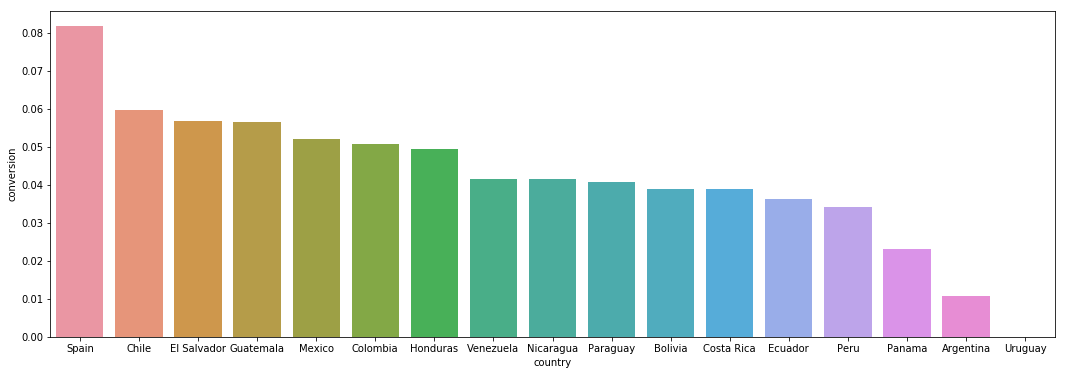

In [5]:
# First check that Spain converts much better than the rest of LatAm countries
groupby_country = data[data['test'] == 0][['conversion', 'country']].groupby('country').mean()
groupby_country = groupby_country.reset_index()
groupby_country = groupby_country.sort_values('conversion', ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=groupby_country, ax=ax)
plt.show()

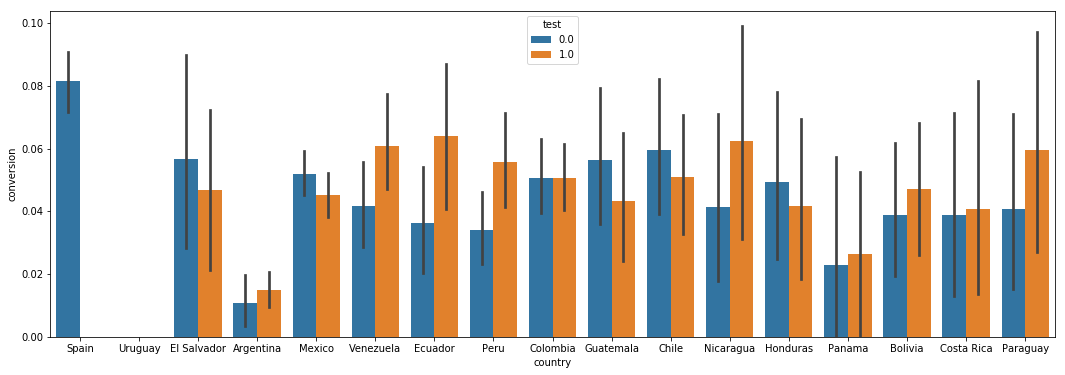

In [6]:
# Visualization
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', hue='test', data=data, ax=ax)
plt.show()

In [7]:
# A/B test
test_data = data[data['country'] != 'Spain']
test_val = test_data[test_data['test'] == 1]['conversion'].values
cont_val = test_data[test_data['test'] == 0]['conversion'].values

print(test_val.mean(), '\t', cont_val.mean())

0.04344111461619348 	 0.0537169722227925


In [8]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-10.396352234567187, pvalue=2.6170281443698924e-25)


# Analysis

In [9]:
data = data[data['country'] != 'Spain']
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0.0,1.0,NaN,NaN,NaN
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0.0,0.0,NaN,NaN,NaN
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0.0,1.0,NaN,NaN,NaN
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0.0,1.0,NaN,NaN,NaN
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0.0,1.0,NaN,NaN,NaN


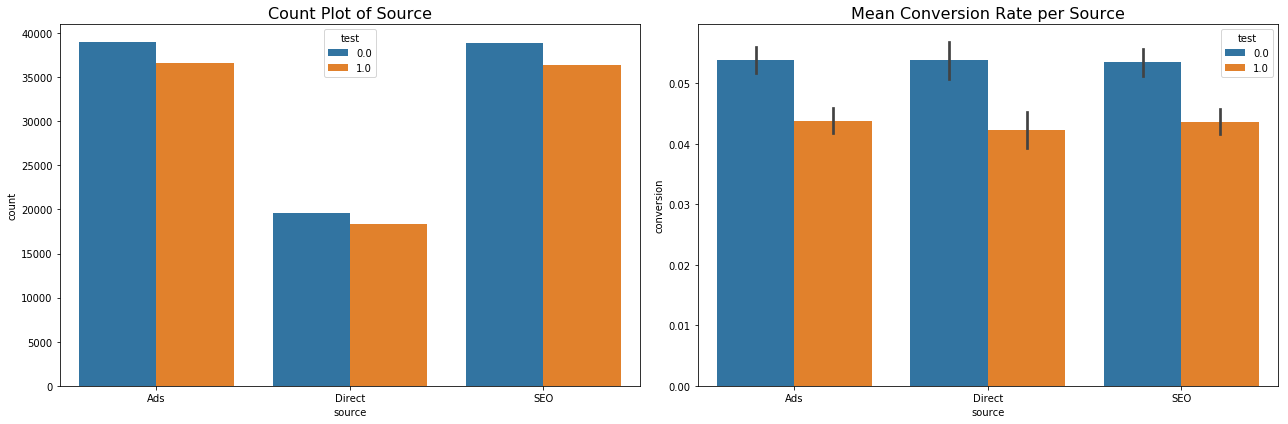

In [10]:
# Visualization of different source
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)

sns.barplot(x='source', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

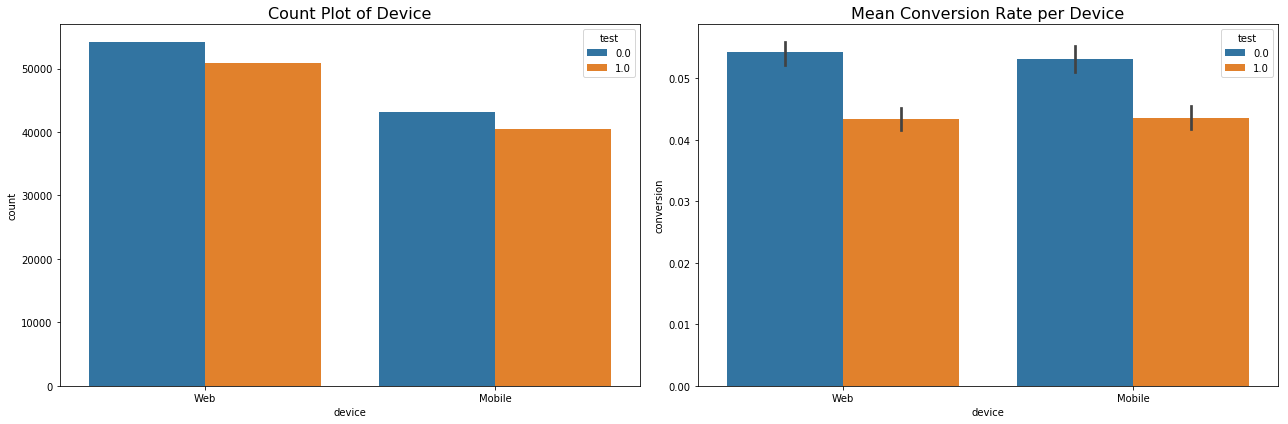

In [11]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='device', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Device', fontsize=16)

sns.barplot(x='device', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Device', fontsize=16)
plt.tight_layout()
plt.show()

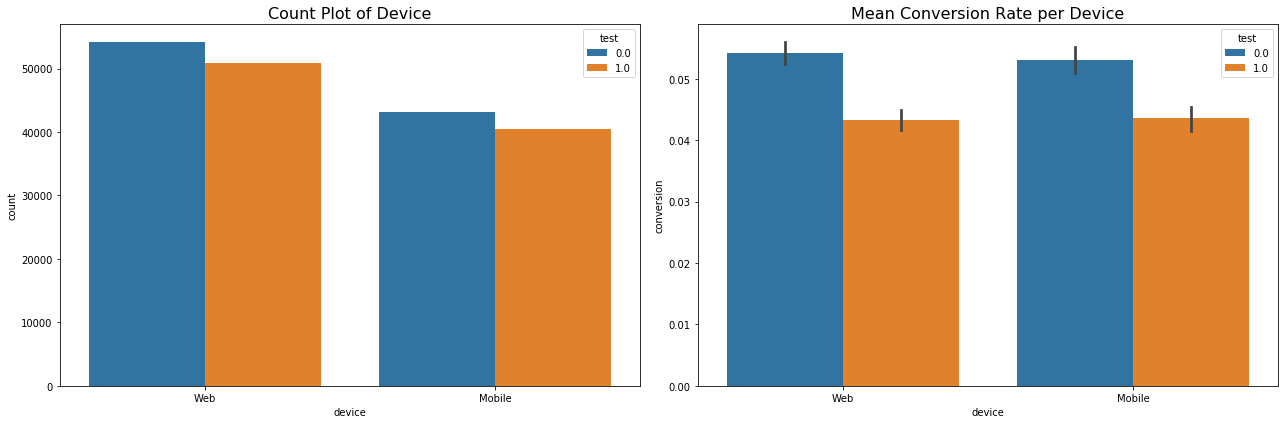

In [12]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='device', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Device', fontsize=16)

sns.barplot(x='device', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Device', fontsize=16)
plt.tight_layout()
plt.show()

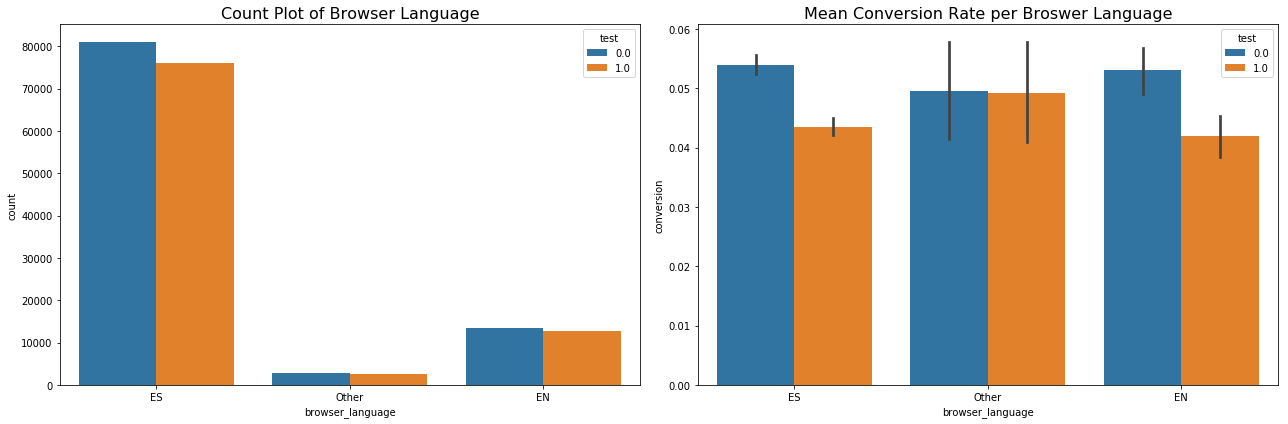

In [13]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser_language', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Browser Language', fontsize=16)

sns.barplot(x='browser_language', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Broswer Language', fontsize=16)
plt.tight_layout()
plt.show()

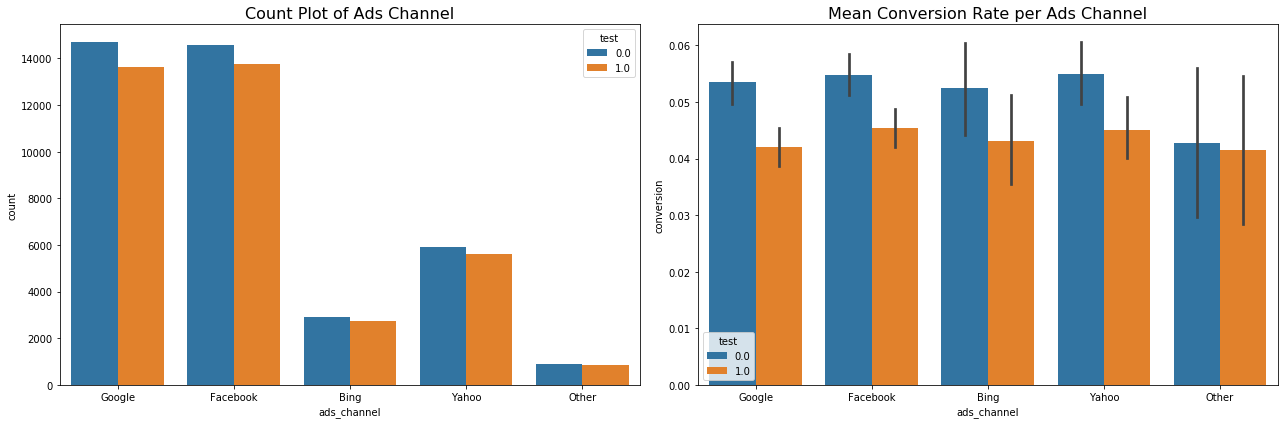

In [14]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='ads_channel', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Ads Channel', fontsize=16)

sns.barplot(x='ads_channel', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Ads Channel', fontsize=16)
plt.tight_layout()
plt.show()

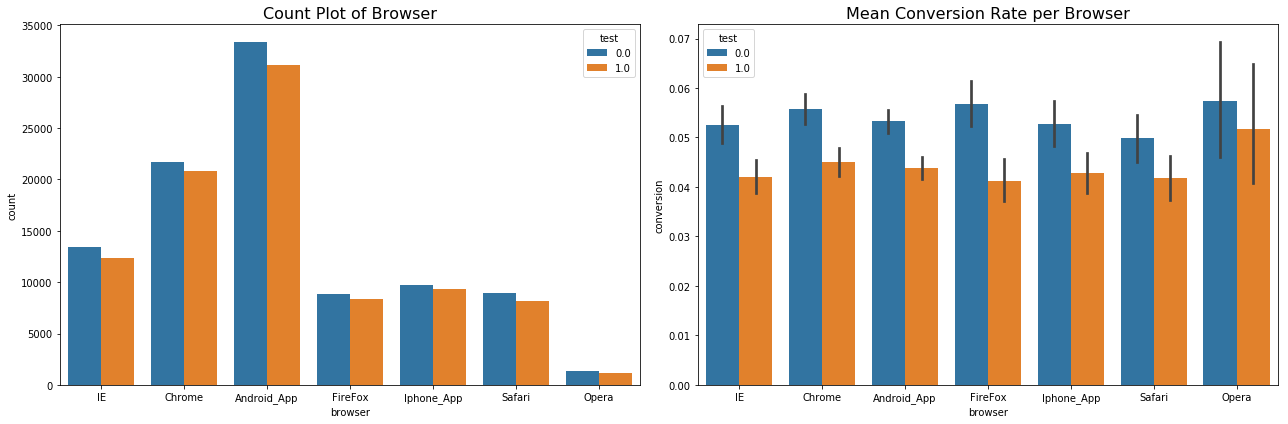

In [15]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Browser', fontsize=16)

sns.barplot(x='browser', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Browser', fontsize=16)
plt.tight_layout()
plt.show()

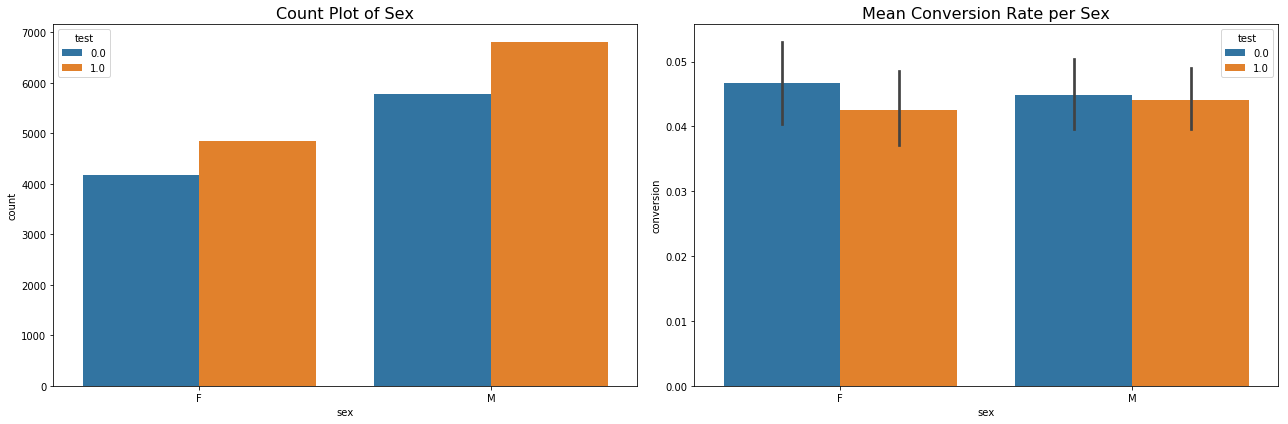

In [16]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='sex', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Sex', fontsize=16)

sns.barplot(x='sex', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Sex', fontsize=16)
plt.tight_layout()
plt.show()

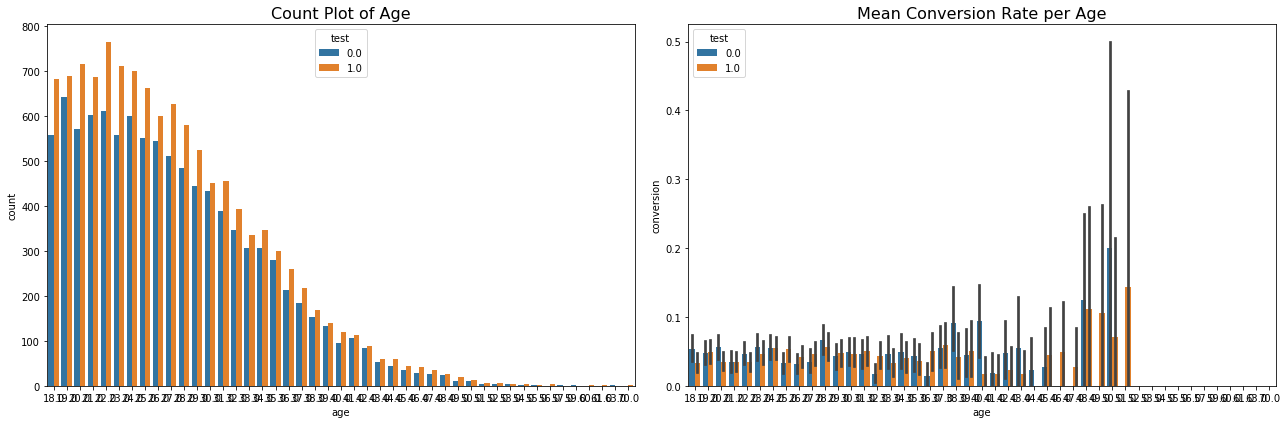

In [17]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='age', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Age', fontsize=16)

sns.barplot(x='age', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Age', fontsize=16)
plt.tight_layout()
plt.show()

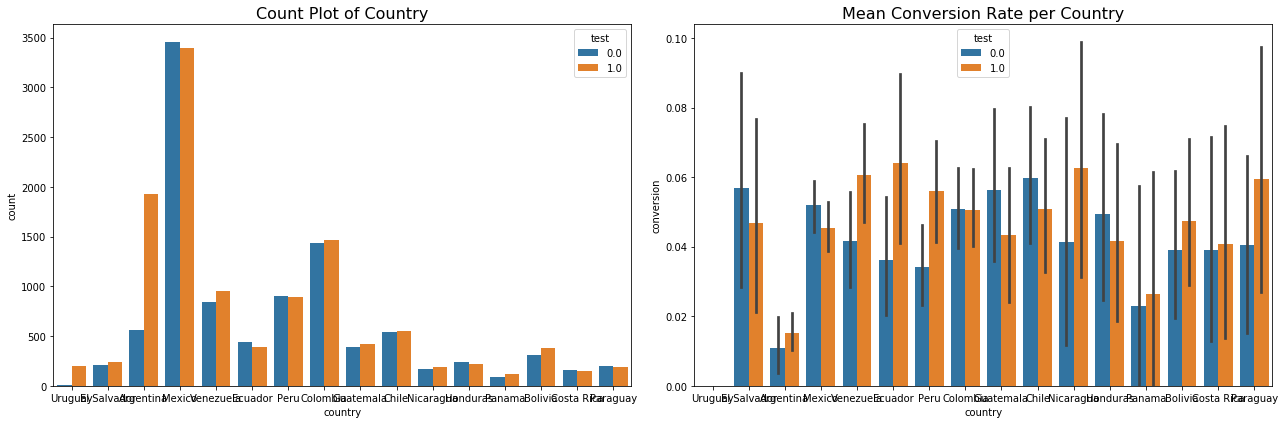

In [18]:
# Visualization of different devices
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='test', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)

sns.barplot(x='country', y='conversion', hue='test', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

In [19]:
countries = [name for name in data['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for country in countries:
    test_val = data[(data['country'] == country) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['country'] == country) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Uruguay                 0.00000         0.00000        nan
El Salvador             0.04681         0.05687   0.633981
Argentina               0.01507         0.01075   0.404341
Mexico                  0.04533         0.05204   0.197107
Venezuela               0.06073         0.04157   0.064286
Ecuador                 0.06394         0.03620   0.069334
Peru                    0.05587         0.03418   0.026550
Colombia                0.05058         0.05069   0.988884
Guatemala               0.04327         0.05641   0.393175
Chile                   0.05091         0.05970   0.526875
Nicaragua               0.06250         0.04142   0.366322
Honduras                0.04167         0.04938   0.692307
Panama                  0.02632         0.02299   0.880425
Bolivia                 0.04724         0.03896   0.593375
Costa Rica              0.04082         0.03896  

* 周期太短，有可能有周期性，比如周末会更多人，没有capture到周期

* 差距虽然显著但是很小

* test 比control的人多，没有随机分

* 人分配country不一样